In [ ]:
!pip install trueskill

In [111]:
import os
import json
import mpmath
from trueskill import Rating, rate, setup
from collections import defaultdict

mpmath.mp.dps = 25
mu = 1500
sigma = 300
beta = sigma / 2.
tau = 3.0
setup(mu=mu, sigma=sigma, beta=beta, backend='mpmath')

trueskill.TrueSkill(mu=1500.000, sigma=300.000, beta=150.000, tau=0.083, draw_probability=10.0%, backend='mpmath')

In [112]:
rating_dict = {}
num_contests = defaultdict(int)
cache_dir = '../cache/codeforces'
jsons = [file for file in os.listdir(cache_dir) if '.json' == file[-5:]]
jsons = sorted(jsons, key=lambda x : int(x.split('.')[0]))

In [113]:
pair_inv = 0
ncon = 0
L = 5
for file in jsons:
    if int(file.split('.')[0]) > 100:
        break
    
    print('Rating contest {}'.format(file))
    path = os.path.join(cache_dir, file)
    data = json.load(open(path, encoding="utf8"))
    names, users, ranks = [], [], []

    for userdata in data['standings']:
        username, lo, hi = userdata
        if username not in rating_dict:
            rating_dict[username] = Rating(mu, sigma)

        names.append(username)
        users.append((rating_dict[username],))
        ranks.append(lo)
        num_contests[username] += 1
    
    #print(users, ranks)
    predicted = [(rating_dict[username].mu, name) for name in names]
    predicted = sorted(predicted, reverse=True)
    prank = {}
    for i, (r, n) in enumerate(predicted):
        prank[n] = i
        
    ncorr = 0
    totp = 0
    for winner, wr in zip(names, ranks):
        for loser, lr in zip(names, ranks):
            if num_contests[winner] <= L or num_contests[loser] <= L:
                continue
            if wr >= lr:
                continue
            if prank[winner] < prank[loser]:
                ncorr += 2
            totp += 2
    n = len(names)
    for name in names:
        if num_contests[name] <= L:
            n -= 1
    
    if n < 3:
        new_ratings = rate(users, ranks)
        for i, name in enumerate(names):
            rating_dict[name] = new_ratings[i][0]
        continue
            
    tied = n * (n-1) - totp
    pair_inv += 100 * (ncorr + tied) / (n-1)
    ncon += n
        
    print(totp, tied, n, ncorr)
    
    new_ratings = rate(users, ranks)
    for i, name in enumerate(names):
        rating_dict[name] = new_ratings[i][0]

print(pair_inv / ncon)

Rating contest 1.json
Rating contest 2.json
Rating contest 3.json
Rating contest 4.json
Rating contest 5.json
Rating contest 6.json
Rating contest 7.json
20 0 5 8
Rating contest 8.json
338 4 19 188
Rating contest 9.json
342 0 19 208
Rating contest 10.json
3528 12 60 1802
Rating contest 11.json
8368 4 92 4204
Rating contest 12.json
1972 8 45 1090
Rating contest 13.json
13838 204 119 6270
Rating contest 14.json
2442 8 50 1652
Rating contest 16.json
2248 8 48 1332
Rating contest 17.json
20226 80 143 10096
Rating contest 18.json
3296 10 58 1708
Rating contest 19.json
21230 232 147 10232
Rating contest 22.json
3184 8 57 1726
Rating contest 23.json
21638 118 148 11274
Rating contest 24.json
25326 114 160 12392
Rating contest 25.json
4948 22 71 2630
Rating contest 26.json
32522 58 181 14540
Rating contest 27.json
5280 122 74 2418
Rating contest 28.json
23432 438 155 11436
Rating contest 29.json
5078 34 72 2224
Rating contest 30.json
54690 1242 237 27588
Rating contest 31.json
11020 110 106 51

In [114]:
items = sorted([(x[1], x[0]) for x in rating_dict.items() if num_contests[x[0]] >= 2], reverse=True)

In [115]:
items

[(trueskill.Rating(mu=6086.545, sigma=100.081), 'dgozman'),
 (trueskill.Rating(mu=5409.955, sigma=72.942), 'donehl'),
 (trueskill.Rating(mu=5365.673, sigma=84.106), 'Stigius'),
 (trueskill.Rating(mu=5360.665, sigma=83.366), 'darnley'),
 (trueskill.Rating(mu=5349.169, sigma=49.587), 'neal'),
 (trueskill.Rating(mu=5231.896, sigma=72.893), 'White_Bear'),
 (trueskill.Rating(mu=5151.960, sigma=65.921), 'andrewzta'),
 (trueskill.Rating(mu=5063.745, sigma=30.086), 'tourist'),
 (trueskill.Rating(mu=5015.883, sigma=32.654), 'watashi'),
 (trueskill.Rating(mu=5005.142, sigma=36.950), 'dzhulgakov'),
 (trueskill.Rating(mu=4991.755, sigma=100.810), 'tomek'),
 (trueskill.Rating(mu=4971.534, sigma=45.102), 'ACRush'),
 (trueskill.Rating(mu=4957.163, sigma=32.637), 'Petr'),
 (trueskill.Rating(mu=4947.804, sigma=100.065), 'zouxun'),
 (trueskill.Rating(mu=4921.226, sigma=65.851), 'arseny30'),
 (trueskill.Rating(mu=4909.443, sigma=36.228), 'Shef'),
 (trueskill.Rating(mu=4854.214, sigma=49.483), 'stgatilov'

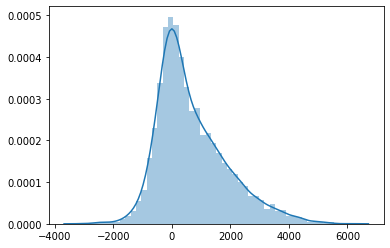

In [116]:
ratings = [x[0].mu for x in items]
import seaborn as sns
sns.distplot(ratings)